# EDA on Haberman's Survival

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hd = pd.read_csv("C:/Users/mayacharyk/Downloads/haberman.csv")

In [3]:
hd.head()

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Data Description: 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Columns: 
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

#### Objective:
1. End goal is that to predict the survival status based on the inputs.
2. At present, to perform basic EDA on this data set

In [4]:
# (Q) how many data-points and features?
print(hd.shape)

(306, 4)


In [5]:
#(Q) What are the column names in our dataset?
hd.columns

Index(['Age', 'Year', 'Nodes ', 'Status'], dtype='object')

In [6]:
#(Q) How many data points for each class are present? 
hd['Status'].value_counts()

1    225
2     81
Name: Status, dtype: int64

In [7]:
hd['Status'].value_counts(normalize = True)

1    0.735294
2    0.264706
Name: Status, dtype: float64

In [8]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age       306 non-null int64
Year      306 non-null int64
Nodes     306 non-null int64
Status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
hd.describe()

,Age,Year,Nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
print(hd["Year"].value_counts())
print(hd["Year"].value_counts().mean())

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year, dtype: int64
25.5


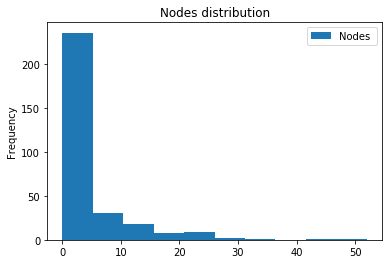

In [12]:
hd['Nodes '].plot(kind = 'hist', legend = True, title = "Nodes distribution" )

#### Observations:
1. There are no missing values in the dataset.
2. Status is the output column
3. the data set is imbalanced,  as we see there for category 1 we have 73.5% records and 26.5% for category 2
4. The Age of the patient vary from 30 to 83, with mean value as 52.45
5. Year range we can see from 58 to 69. average of yearly operation count is 25.5
6. The maximum number of positive lymph nodes observed is 52, but nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes

In [13]:
import seaborn as sns

C:\Users\mayacharyk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


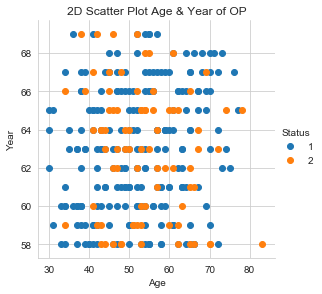

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(hd, hue="Status", size=4) \
   .map(plt.scatter, "Age", "Year") \
   .add_legend();
plt.title("2D Scatter Plot Age & Year of OP")
plt.show();

No clear insights

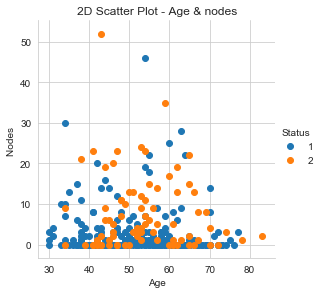

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(hd, hue="Status", size=4) \
   .map(plt.scatter, "Age", "Nodes ") \
   .add_legend();
plt.title("2D Scatter Plot - Age & nodes")
plt.show();

No clear insights, But we have more data with less nodes and servivals are more whom were having less nodes

C:\Users\mayacharyk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


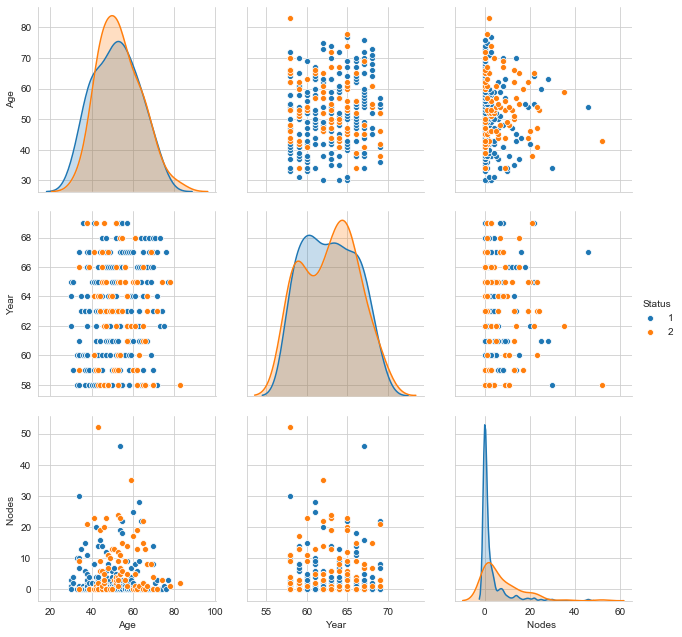

In [16]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hd, hue="Status", vars = ["Age", "Year", "Nodes "], size=3);
plt.show()

by above pair plot we can see that the data for Ages Vs Survival, Year Vs Survival are not linearly separable. only nodes Vs survival is have some clear insight

#### Univariate Analysis(pdf, cdf, boxplot and violin plot)

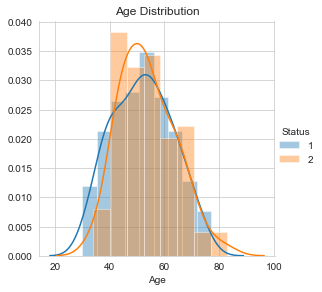

In [17]:
sns.FacetGrid(hd, hue="Status", size=4) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Age Distribution")
plt.show();

1. there is no clear information, but the patients with less than 35 years of age as more chances of surviving more.

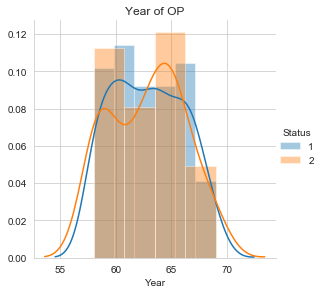

In [18]:
sns.FacetGrid(hd, hue="Status", size=4) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.title("Year of OP")
plt.show();

year has no direct relation with status of patient

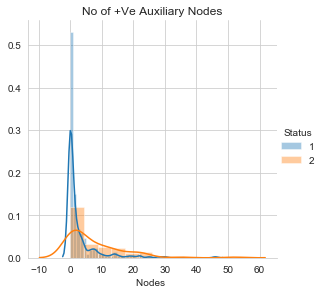

In [19]:
sns.FacetGrid(hd, hue="Status", size=4) \
   .map(sns.distplot, "Nodes ") \
   .add_legend();
plt.title("No of +Ve Auxiliary Nodes")
plt.show();

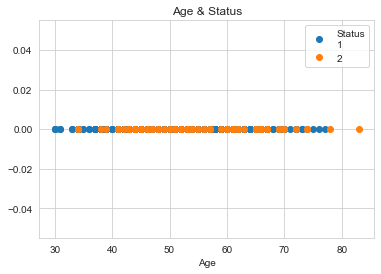

In [20]:
g5= hd.loc[hd["Status"] == 1]
l5 = hd.loc[hd["Status"] == 2]
plt.plot(g5["Age"], np.zeros_like(g5["Age"]), 'o', label = "Status\n" "1")
plt.plot(l5["Age"], np.zeros_like(l5["Age"]), 'o', label = "2")
plt.title("Age & Status")
plt.xlabel("Age")
plt.legend()
plt.show()

all the patients with less than 34 years of age were survived 5+ yrs  

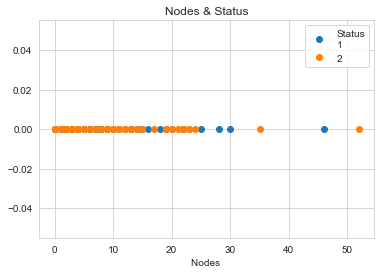

In [21]:
g5= hd.loc[hd["Status"] == 1]
l5 = hd.loc[hd["Status"] == 2]
plt.plot(g5["Nodes "], np.zeros_like(g5["Nodes "]), 'o', label = "Status\n" "1")
plt.plot(l5["Nodes "], np.zeros_like(l5["Nodes "]), 'o', label = "2")
plt.title("Nodes & Status")
plt.xlabel("Nodes ")
plt.legend()
plt.show()

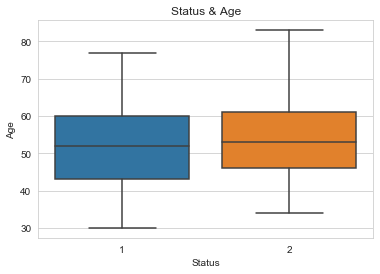

In [22]:
sns.boxplot(x='Status',y='Age', data=hd)
plt.title("Status & Age")
plt.show()

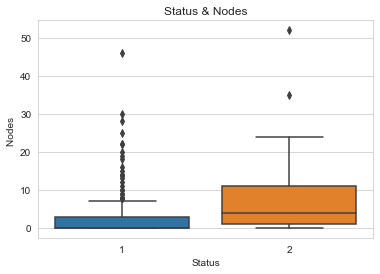

In [23]:
sns.boxplot(x='Status',y='Nodes ', data=hd)
plt.title("Status & Nodes")
plt.show()

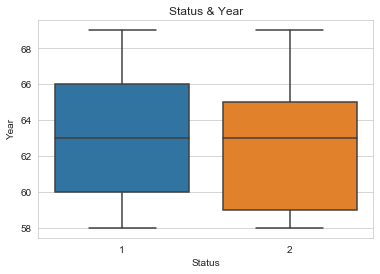

In [24]:
sns.boxplot(x='Status',y='Year', data=hd)
plt.title("Status & Year")
plt.show()

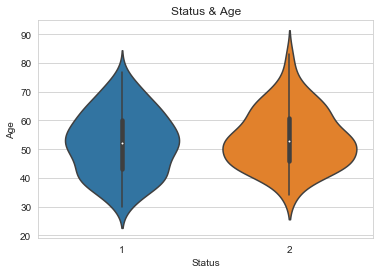

In [25]:
sns.violinplot(x="Status", y="Age", data=hd, size=8)
plt.title("Status & Age")
plt.show()

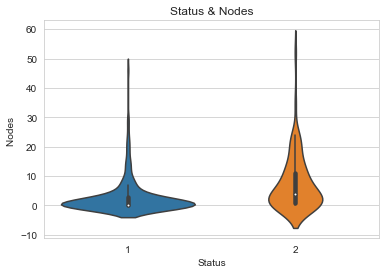

In [26]:
sns.violinplot(x="Status", y="Nodes ", data=hd, size=8)
plt.title("Status & Nodes")
plt.show()

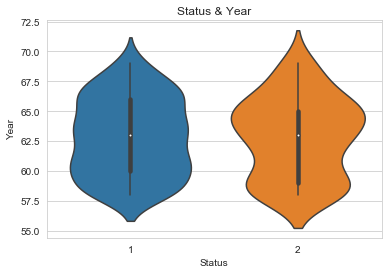

In [27]:
sns.violinplot(x="Status", y="Year", data=hd, size=8)
plt.title("Status & Year")
plt.show()

#### PDF and CDF of age

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


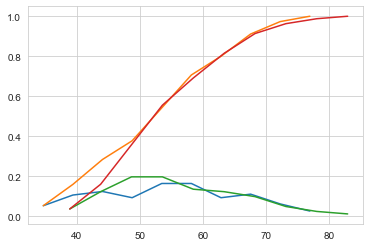

In [30]:
g5 = hd.loc[hd["Status"] == 1]
l5 = hd.loc[hd["Status"] == 2]
counts, bin_edges = np.histogram(g5["Age"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(l5["Age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

PDF and CDF of Nodes

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


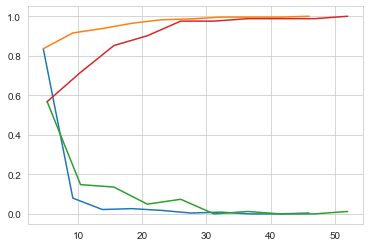

In [31]:
g5 = hd.loc[hd["Status"] == 1]
l5 = hd.loc[hd["Status"] == 2]
counts, bin_edges = np.histogram(g5["Nodes "], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(l5["Nodes "], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

In [28]:
print("Means:")
print(np.mean(g5["Age"]))
print(np.mean(l5["Age"]))

print("\nStd-dev:");
print(np.std(g5["Age"]))
print(np.std(l5["Age"]))

Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


In [29]:
print("Means:")
print(np.mean(g5["Nodes "]))
print(np.mean(l5["Nodes "]))

print("\nStd-dev:");
print(np.std(g5["Nodes "]))
print(np.std(l5["Nodes "]))

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


In [30]:
print("Means:")
print(np.mean(g5["Year"]))
print(np.mean(l5["Year"]))

print("\nStd-dev:");
print(np.std(g5["Year"]))
print(np.std(l5["Year"]))

Means:
62.86222222222222
62.82716049382716

Std-dev:
3.2157452144021956
3.3214236255207883


In [32]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(g5["Age"]))
print(np.median(l5["Age"]))


print("\nQuantiles:")
print(np.percentile(g5["Age"],np.arange(0, 100, 25)))
print(np.percentile(l5["Age"],np.arange(0, 100, 25)))

print("\n90th Percentile:")
print(np.percentile(g5["Age"],90))
print(np.percentile(l5["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(g5["Age"]))
print(robust.mad(l5["Age"]))



Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentile:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [33]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(g5["Nodes "]))
print(np.median(l5["Nodes "]))

print("\nQuantiles:")
print(np.percentile(g5["Nodes "],np.arange(0, 100, 25)))
print(np.percentile(l5["Nodes "],np.arange(0, 100, 25)))

print("\n90th Percentile:")
print(np.percentile(g5["Nodes "],90))
print(np.percentile(l5["Nodes "],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(g5["Nodes "]))
print(robust.mad(l5["Nodes "]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


In [34]:
print("\nMedians:")
print(np.median(g5["Year"]))
print(np.median(l5["Year"]))

print("\nQuantiles:")
print(np.percentile(g5["Year"],np.arange(0, 100, 25)))
print(np.percentile(l5["Year"],np.arange(0, 100, 25)))

print("\n90th Percentile:")
print(np.percentile(g5["Year"],90))
print(np.percentile(l5["Year"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(g5["Year"]))
print(robust.mad(l5["Year"]))


Medians:
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentile:
67.0
67.0

Median Absolute Deviation
4.447806655516806
4.447806655516806


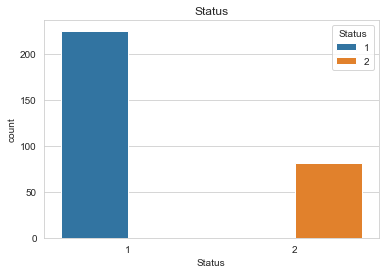

In [32]:
sns.countplot(x=hd['Status'], hue = hd["Status"])
plt.title("Status")
plt.show()

In [33]:
hdg5 = hd.loc[hd["Status"] == 1]
hdl5 = hd.loc[hd["Status"] == 2]

In [34]:
hdg5.describe()

,Age,Year,Nodes,Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [35]:
hdl5.describe()

,Age,Year,Nodes,Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#### Final Observations:
1. The good thing about the data is we have more patient records who were survived more than five years. I hope the population data would be same as this sample one. 
2. Only the column "Nodes" have high significance than year and age 
3. Although the data is less, The patients who are less then 34 years were all survived 5+ yrs and the above 77 age group were not able to surivie 5+ years
4. less nodes more life expectency. 84% of people who survived 5+ yrs were having less than 5 nodes 
5. In the year 68 and 69 we have less no of records 
6. The data set is imbalanced and the no of records are very less, with this limited amount of data we cannot get accurate insights. I think the data is insufficient to make any inferences out of it  

References: 
1. Inspired by Srikanth Varma's EDA on Iris data set
2. https://www.kaggle.com/premvardhan/exploratory-data-analysis-haberman-s-survival